# Title
skdfhiuefh
sdfsf

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
import pandas as pd

%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [2]:
#=====================================
# Load txt file to pandas dataframe
#=====================================
data = pd.read_csv('analisi/mu-g4.txt', sep='\t', names=['tdc11', 'tdc12', 'tdc13', 'tdc14', 'tdc15', 'tdc16', 'tdc17', 'tdc18',
                                                        'tdc21', 'tdc22', 'tdc23', 'tdc24', 'tdc25', 'tdc26', 'tdc27', 'tdc28',
                                                       ])
data = data.rename(columns={'tdc11' : 'p0_1',
                            'tdc12' : 'p1_1',
                            'tdc13' : 'p2_1',
                            'tdc14' : 'start2',
                            'tdc24' : 'p0_2',
                            'tdc25' : 'p1_2',
                            'tdc26' : 'p2_2',
                            'tdc23' : 'stop2',
                           })
print('Total number of events:', len(data))
data.head()

NameError: name 'pd' is not defined

In [87]:
#=====================================
# Convert tdc units into ns
#=====================================
def tdc_to_ns(tdc_unit, a=5000/4095, b=0):
    ns = tdc_unit * a + b
    return ns

#=====================================
# Only one valide time for each detector
#=====================================
def merge_time_p0(data):
    if data['p0_1']==4095:
        return data['p0_2_ns']
    else:
        return data['p0_1_ns']

def merge_time_p1(data):
    if data['p1_1']==4095:
        return data['p1_2_ns']
    else:
        return data['p1_1_ns']
    
def merge_time_p2(data):
    if data['p2_1']==4095:
        return data['p2_2_ns']
    else:
        return data['p2_1_ns']


#=====================================
# Add actual time variables to the dataframe
#=====================================
def conv_time(data):
    df = data
    df.start2 = tdc_to_ns(df.start2)
    df['p0_1_ns'] = tdc_to_ns(df.p0_1)
    df['p1_1_ns'] = tdc_to_ns(df.p1_1)
    df['p2_1_ns'] = tdc_to_ns(df.p2_1)
    df['p0_2_ns'] = tdc_to_ns(df.p0_2) + data.start2
    df['p1_2_ns'] = tdc_to_ns(df.p1_2) + data.start2
    df['p2_2_ns'] = tdc_to_ns(df.p2_2) + data.start2
    
    df['p0_time'] = df.apply(lambda df: merge_time_p0(df),axis=1)
    df['p1_time'] = df.apply(lambda df: merge_time_p1(df),axis=1)
    df['p2_time'] = df.apply(lambda df: merge_time_p2(df),axis=1)
    return df




In [88]:
#=====================================
# Data selection cuts
#=====================================

def cut_p0(data):
    cut = ((data.p0_1!=4095) | (data.p0_2!=4095)) & ((data.p1_1==4095) & (data.p1_2==4095)  & (data.p2_1==4095) & (data.p2_2==4095))
    p0 = data[cut]
    #p0 = p0.rename(columns={'p0_1': 'time_tdc1', 'p0_2': 'time_tdc2'})
    #p0 = p0[['tdc1','tdc2']]
    return p0

def cut_p1(data):
    cut = ((data.p1_1!=4095) | (data.p1_2!=4095)) & ((data.p0_1==4095) & (data.p0_2==4095)  & (data.p2_1==4095) & (data.p2_2==4095))
    p1 = data[cut]
    #p1 = p1.rename(columns={'p1_1': 'time_tdc1', 'p1_2': 'time_tdc2'})
    #p1 = p1[['tdc1','tdc2']]
    return p1

def cut_p2(data):
    cut = ((data.p2_1!=4095) | (data.p2_2!=4095)) & ((data.p1_1==4095) & (data.p1_2==4095)  & (data.p0_1==4095) & (data.p0_2==4095))
    p2 = data[cut]
    #p2 = p2.rename(columns={'p2_1': 'time_tdc1', 'p2_2': 'time_tdc2'})
    #p2 = p2[['tdc1','tdc2']]
    return p2

In [89]:
#=====================================
# Apply first selection and add time variables to main dataframe
#=====================================

df = data[(data.p0_1!=4095) | (data.p0_2!=4095) | (data.p1_1!=4095) | (data.p1_2!=4095) | (data.p2_1!=4095) | (data.p2_2!=4095)]
df = conv_time(df)
print('Total numer of triggers:', len(data))
print('Total numer of valid events:', len(df))
df_all.head()

/Users/digangi/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/digangi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/digangi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

Total numer of triggers: 238658
Total numer of valid events: 3513


,tdc11,tdc12,tdc13,tdc14,p0_1,p1_1,p2_1,start2,tdc21,tdc22,...,fake2,p0_1_ns,p1_1_ns,p2_1_ns,p0_2_ns,p1_2_ns,p2_2_ns,p0_time,p1_time,p2_time
0,4095,4095,4095,4095,4095,4095,4095,4308.913309,4095,4095,...,NaN,5000.0,5000.0,5000.0,9308.913309,9308.913309,9308.913309,9308.913309,9308.913309,9308.913309
1,4095,4095,4095,4095,4095,4095,4095,4310.134310,4095,4095,...,NaN,5000.0,5000.0,5000.0,9310.134310,9310.134310,9310.134310,9310.134310,9310.134310,9310.134310
2,4095,4095,4095,4095,4095,4095,4095,4308.913309,4095,4095,...,NaN,5000.0,5000.0,5000.0,9308.913309,9308.913309,9308.913309,9308.913309,9308.913309,9308.913309
3,4095,4095,4095,4095,4095,4095,4095,4308.913309,4095,4095,...,NaN,5000.0,5000.0,5000.0,9308.913309,9308.913309,9308.913309,9308.913309,9308.913309,9308.913309
4,4095,4095,4095,4095,4095,4095,4095,4308.913309,4095,4095,...,NaN,5000.0,5000.0,5000.0,9308.913309,9308.913309,9308.913309,9308.913309,9308.913309,9308.913309


P0 events: 174


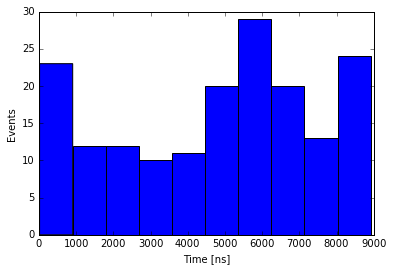

In [91]:
p0 = cut_p0(df_all)
p0 = p0['p0_time']
print('P0 events:', len(p0))

plt.hist(p0, bins=10)
plt.xlabel('Time [ns]')
plt.ylabel('Events')
plt.show()

P1 events: 3412


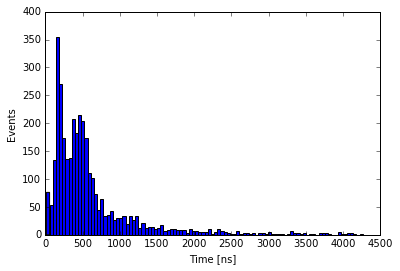

In [93]:
p1 = cut_p1(df_all)
p1 = p1['p1_time']
print('P1 events:', len(p1))

plt.hist(p1, bins=100)
plt.xlabel('Time [ns]')
plt.ylabel('Events')
plt.show()

P2 events: 367


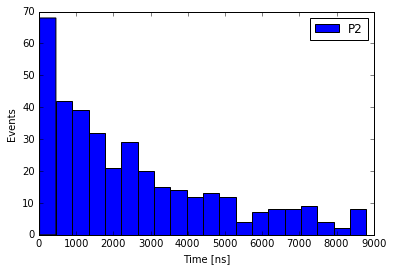

In [94]:
p2 = cut_p2(df_all)
p2 = p2['p2_time']
print('P2 events:', len(p2))

plt.hist(p2, bins=20, label='P2')
plt.xlabel('Time [ns]')
plt.ylabel('Events')
plt.legend()
plt.show()

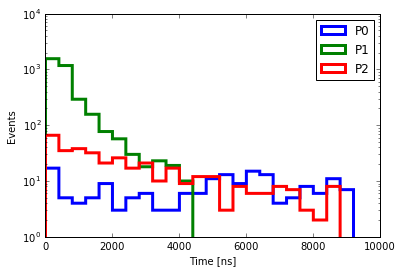

In [95]:
plt.hist(p0, bins=25, range=(0,10000), histtype='step', lw=3, label='P0')
plt.hist(p1, bins=25, range=(0,10000), histtype='step', lw=3, label='P1')
plt.hist(p2, bins=25, range=(0,10000), histtype='step', lw=3, label='P2')
plt.yscale('log')
plt.xlabel('Time [ns]')
plt.ylabel('Events')
plt.legend()
plt.show()